### Merge flight and weather data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load weather data
weather_df = pd.read_csv("X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ScientificComp/CHSExpandedVariables.csv")
weather_df["DATE"] = pd.to_datetime(weather_df["DATE"])  # Convert into date format

# Load flight delay data
flights_df = pd.read_csv("X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ScientificComp/CHS_Statistics_Departures.csv") 
flights_df["DATE"] = pd.to_datetime(flights_df["DATE"])  # Convert date format

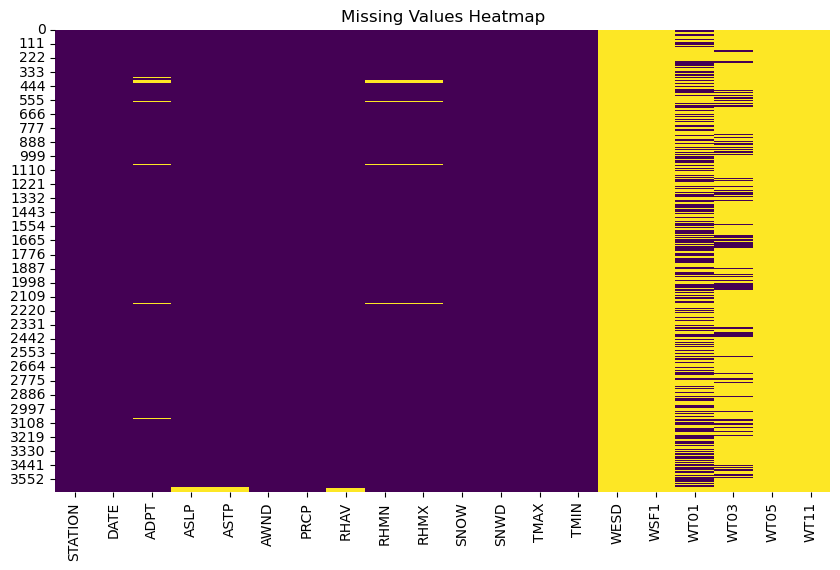

In [4]:
# create heat maps to show the percentage of missing values


plt.figure(figsize=(10, 6))
sns.heatmap(weather_df.isnull(), cbar=False, cmap="viridis")
plt.title(f"Missing Values Heatmap")
plt.show()




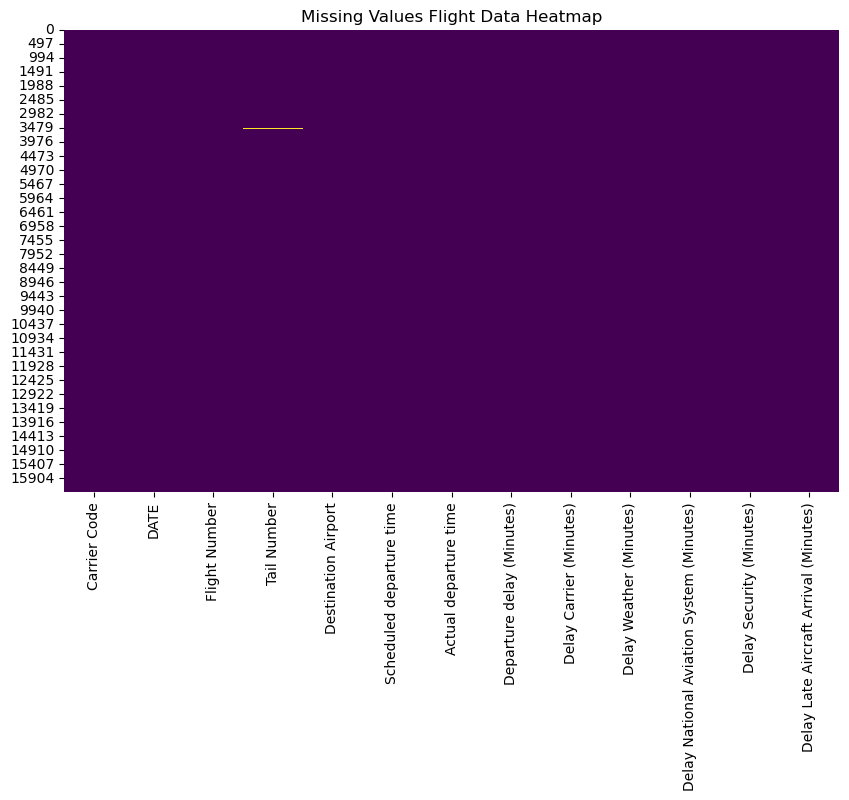

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(flights_df.isnull(), cbar=False, cmap="viridis")
plt.title(f"Missing Values Flight Data Heatmap")
plt.show()

In [6]:
# Do an inner join on Date
merged_df = pd.merge(flights_df, weather_df, on="DATE", how="inner")


merged_df 

,Carrier Code,DATE,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),...,SNOW,SNWD,TMAX,TMIN,WESD,WSF1,WT01,WT03,WT05,WT11
0,AA,2017-01-01,402.0,N107AA,CLT,16:07,16:09,2.0,0.0,0.0,...,0.0,0.0,68,49,NaN,NaN,1.0,NaN,NaN,NaN
1,AA,2018-01-01,880.0,N767UW,CLT,7:10,7:07,-3.0,0.0,0.0,...,0.0,0.0,34,23,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,2018-01-01,1718.0,N764US,DFW,15:10,17:15,125.0,99.0,0.0,...,0.0,0.0,34,23,NaN,NaN,NaN,NaN,NaN,NaN
3,AA,2018-01-01,2069.0,N123UW,CLT,12:53,12:50,-3.0,0.0,0.0,...,0.0,0.0,34,23,NaN,NaN,NaN,NaN,NaN,NaN
4,AA,2019-01-01,659.0,N756US,CLT,12:42,12:35,-7.0,0.0,0.0,...,0.0,0.0,78,61,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,AA,2023-12-31,1287.0,N5007E,MIA,6:05,5:59,-6.0,0.0,0.0,...,0.0,0.0,60,31,NaN,NaN,NaN,NaN,NaN,NaN
16373,AA,2023-12-31,1421.0,N745VJ,MIA,18:49,18:56,7.0,0.0,0.0,...,0.0,0.0,60,31,NaN,NaN,NaN,NaN,NaN,NaN
16374,AA,2023-12-31,1426.0,N104UW,CLT,11:20,11:10,-10.0,0.0,0.0,...,0.0,0.0,60,31,NaN,NaN,NaN,NaN,NaN,NaN
16375,AA,2023-12-31,1520.0,N813NN,DFW,15:15,15:08,-7.0,0.0,0.0,...,0.0,0.0,60,31,NaN,NaN,NaN,NaN,NaN,NaN


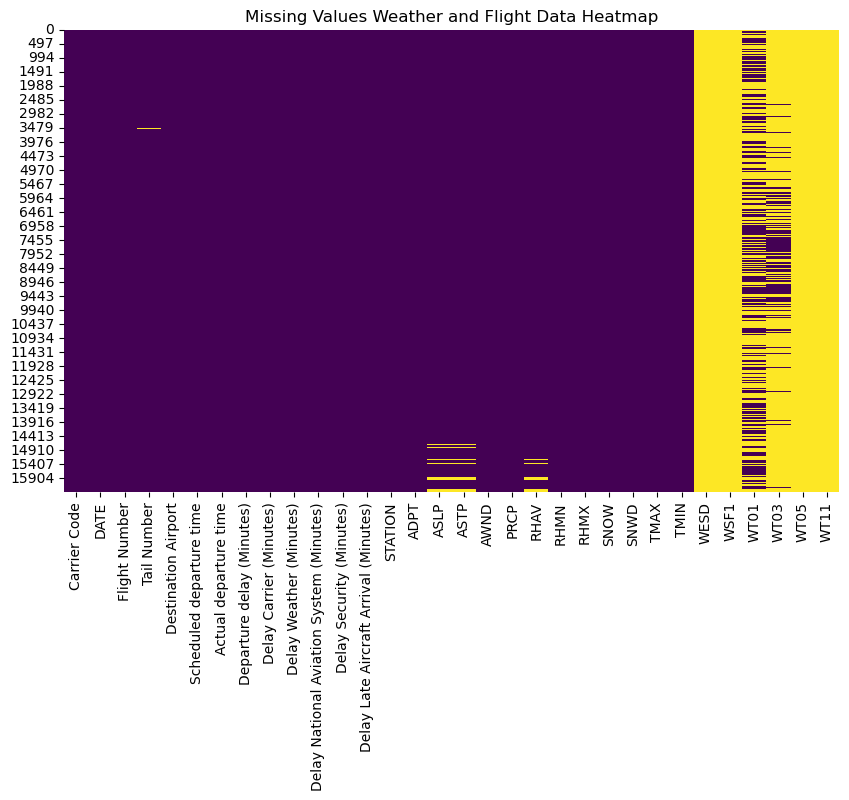

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap="viridis")
plt.title(f"Missing Values Weather and Flight Data Heatmap")
plt.show()

######   WESD, WSF1, WT01, WT03, WT05, WT11 have a lot of missing data, remove. 

######   Water equivalent of snow on the ground (inches or mm as per user preference)
######   Fastest 1-minute wind speed (miles per hour or meters per second as per user preference)
######   Fog, ice fog, or freezing fog (may include heavy fog)
######   Thunder
######   Hail (may include small hail)
######   High or damaging winds 
######  Delete 'Carrier Code', 'Flight Number','Tail Number','Scheduled departure time','Actual departure time' because they're unecessary


In [8]:
merged_df1 = merged_df.drop(['STATION','WESD', 'WSF1', 'WT01','WT03','WT05', 'WT11','Carrier Code', 'Flight Number','Tail Number','Scheduled departure time','Actual departure time'], axis=1, errors='ignore')  # Ignore any error that may arrise if columns don't exist

merged_df1 

,DATE,Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),ADPT,ASLP,ASTP,AWND,PRCP,RHAV,RHMN,RHMX,SNOW,SNWD,TMAX,TMIN
0,2017-01-01,CLT,2.0,0.0,0.0,0.0,0.0,0.0,54.0,29.98,29.93,4.25,0.05,68.0,76.0,93.0,0.0,0.0,68,49
1,2018-01-01,CLT,-3.0,0.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,14.32,0.00,71.0,24.0,42.0,0.0,0.0,34,23
2,2018-01-01,DFW,125.0,99.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,14.32,0.00,71.0,24.0,42.0,0.0,0.0,34,23
3,2018-01-01,CLT,-3.0,0.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,14.32,0.00,71.0,24.0,42.0,0.0,0.0,34,23
4,2019-01-01,CLT,-7.0,0.0,0.0,0.0,0.0,0.0,64.0,30.06,30.00,6.71,0.00,74.0,67.0,100.0,0.0,0.0,78,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,2023-12-31,MIA,-6.0,0.0,0.0,0.0,0.0,0.0,32.0,NaN,NaN,6.04,0.00,NaN,33.0,89.0,0.0,0.0,60,31
16373,2023-12-31,MIA,7.0,0.0,0.0,0.0,0.0,0.0,32.0,NaN,NaN,6.04,0.00,NaN,33.0,89.0,0.0,0.0,60,31
16374,2023-12-31,CLT,-10.0,0.0,0.0,0.0,0.0,0.0,32.0,NaN,NaN,6.04,0.00,NaN,33.0,89.0,0.0,0.0,60,31
16375,2023-12-31,DFW,-7.0,0.0,0.0,0.0,0.0,0.0,32.0,NaN,NaN,6.04,0.00,NaN,33.0,89.0,0.0,0.0,60,31


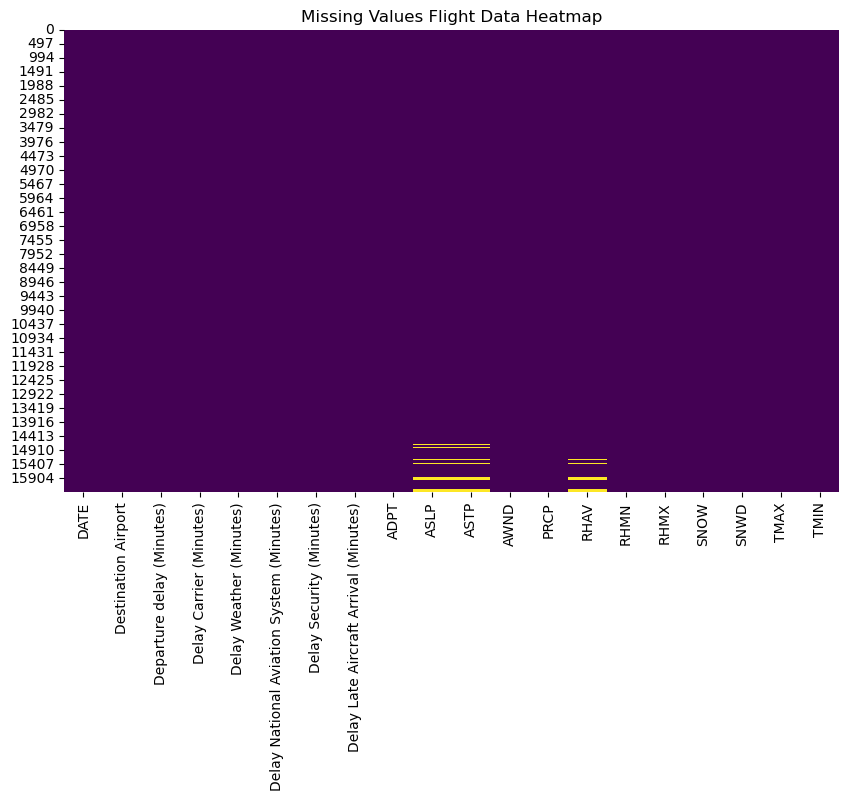

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df1.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Flight Data Heatmap")
plt.show()


In [10]:
merged_df1.isnull().sum()


DATE                         0
Destination Airport          0
Departure delay (Minutes)    0
Delay Carrier (Minutes)      0
Delay Weather (Minutes)      0
                            ..
RHMX                         6
SNOW                         0
SNWD                         0
TMAX                         0
TMIN                         0
Length: 20, dtype: int64

In [11]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


#### Impute missing values via KNN method

In [12]:

from sklearn.impute import KNNImputer

weather_cols = ['ADPT', 'ASLP', 'ASTP', 'AWND', 'RHAV','RHMN','RHMX']
imputer = KNNImputer(n_neighbors=5)

weather_data = merged_df1[weather_cols]

weather_imputed = imputer.fit_transform(weather_data)

for i in range(len(weather_cols)):
    col = weather_cols[i]
    merged_df1[col] = weather_imputed[:, i]

# Check for missing values
print(merged_df1.isnull().sum())


DATE                         0
Destination Airport          0
Departure delay (Minutes)    0
Delay Carrier (Minutes)      0
Delay Weather (Minutes)      0
                            ..
RHMX                         0
SNOW                         0
SNWD                         0
TMAX                         0
TMIN                         0
Length: 20, dtype: int64


In [13]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
# convert destination airport into categorical because depending on the climate, it would affect flight delay
print(merged_df1['Destination Airport'].unique())


['CLT' 'DFW' 'DCA' 'PHL' 'MIA' 'ORD']


In [15]:
# One-hot encode 'Destination Airport' into 6 columns
merged_df1= pd.get_dummies(merged_df1, columns=['Destination Airport'], dtype=int)

merged_df1.head()


,DATE,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),ADPT,ASLP,ASTP,...,SNOW,SNWD,TMAX,TMIN,Destination Airport_CLT,Destination Airport_DCA,Destination Airport_DFW,Destination Airport_MIA,Destination Airport_ORD,Destination Airport_PHL
0,2017-01-01,2.0,0.0,0.0,0.0,0.0,0.0,54.0,29.98,29.93,...,0.0,0.0,68,49,1,0,0,0,0,0
1,2018-01-01,-3.0,0.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,...,0.0,0.0,34,23,1,0,0,0,0,0
2,2018-01-01,125.0,99.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,...,0.0,0.0,34,23,0,0,1,0,0,0
3,2018-01-01,-3.0,0.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,...,0.0,0.0,34,23,1,0,0,0,0,0
4,2019-01-01,-7.0,0.0,0.0,0.0,0.0,0.0,64.0,30.06,30.00,...,0.0,0.0,78,61,1,0,0,0,0,0


In [16]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16377 entries, 0 to 16376
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   DATE                                      16377 non-null  datetime64[ns]
 1   Departure delay (Minutes)                 16377 non-null  float64       
 2   Delay Carrier (Minutes)                   16377 non-null  float64       
 3   Delay Weather (Minutes)                   16377 non-null  float64       
 4   Delay National Aviation System (Minutes)  16377 non-null  float64       
 5   Delay Security (Minutes)                  16377 non-null  float64       
 6   Delay Late Aircraft Arrival (Minutes)     16377 non-null  float64       
 7   ADPT                                      16377 non-null  float64       
 8   ASLP                                      16377 non-null  float64       
 9   ASTP                        

In [17]:
# Extract additional time features
merged_df1['ExactDay'] = merged_df1['DATE'].dt.day
merged_df1['Month'] = merged_df1['DATE'].dt.month
merged_df1['Year'] = merged_df1['DATE'].dt.year
merged_df1['DayOfWeek'] = merged_df1['DATE'].dt.dayofweek
merged_df1

,DATE,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),ADPT,ASLP,ASTP,...,Destination Airport_CLT,Destination Airport_DCA,Destination Airport_DFW,Destination Airport_MIA,Destination Airport_ORD,Destination Airport_PHL,ExactDay,Month,Year,DayOfWeek
0,2017-01-01,2.0,0.0,0.0,0.0,0.0,0.0,54.0,29.98,29.93,...,1,0,0,0,0,0,1,1,2017,6
1,2018-01-01,-3.0,0.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,...,1,0,0,0,0,0,1,1,2018,0
2,2018-01-01,125.0,99.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,...,0,0,1,0,0,0,1,1,2018,0
3,2018-01-01,-3.0,0.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,...,1,0,0,0,0,0,1,1,2018,0
4,2019-01-01,-7.0,0.0,0.0,0.0,0.0,0.0,64.0,30.06,30.00,...,1,0,0,0,0,0,1,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,2023-12-31,-6.0,0.0,0.0,0.0,0.0,0.0,32.0,30.10,30.04,...,0,0,0,1,0,0,31,12,2023,6
16373,2023-12-31,7.0,0.0,0.0,0.0,0.0,0.0,32.0,30.10,30.04,...,0,0,0,1,0,0,31,12,2023,6
16374,2023-12-31,-10.0,0.0,0.0,0.0,0.0,0.0,32.0,30.10,30.04,...,1,0,0,0,0,0,31,12,2023,6
16375,2023-12-31,-7.0,0.0,0.0,0.0,0.0,0.0,32.0,30.10,30.04,...,0,0,1,0,0,0,31,12,2023,6


In [18]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16377 entries, 0 to 16376
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   DATE                                      16377 non-null  datetime64[ns]
 1   Departure delay (Minutes)                 16377 non-null  float64       
 2   Delay Carrier (Minutes)                   16377 non-null  float64       
 3   Delay Weather (Minutes)                   16377 non-null  float64       
 4   Delay National Aviation System (Minutes)  16377 non-null  float64       
 5   Delay Security (Minutes)                  16377 non-null  float64       
 6   Delay Late Aircraft Arrival (Minutes)     16377 non-null  float64       
 7   ADPT                                      16377 non-null  float64       
 8   ASLP                                      16377 non-null  float64       
 9   ASTP                        

In [19]:
#Binary column that states whether a flight was delayed or not
merged_df1['Delay'] = (merged_df1['Departure delay (Minutes)'] > 15).astype(int)
merged_df1

,DATE,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),ADPT,ASLP,ASTP,...,Destination Airport_DCA,Destination Airport_DFW,Destination Airport_MIA,Destination Airport_ORD,Destination Airport_PHL,ExactDay,Month,Year,DayOfWeek,Delay
0,2017-01-01,2.0,0.0,0.0,0.0,0.0,0.0,54.0,29.98,29.93,...,0,0,0,0,0,1,1,2017,6,0
1,2018-01-01,-3.0,0.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,...,0,0,0,0,0,1,1,2018,0,0
2,2018-01-01,125.0,99.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,...,0,1,0,0,0,1,1,2018,0,1
3,2018-01-01,-3.0,0.0,0.0,0.0,0.0,0.0,4.0,30.02,29.97,...,0,0,0,0,0,1,1,2018,0,0
4,2019-01-01,-7.0,0.0,0.0,0.0,0.0,0.0,64.0,30.06,30.00,...,0,0,0,0,0,1,1,2019,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,2023-12-31,-6.0,0.0,0.0,0.0,0.0,0.0,32.0,30.10,30.04,...,0,0,1,0,0,31,12,2023,6,0
16373,2023-12-31,7.0,0.0,0.0,0.0,0.0,0.0,32.0,30.10,30.04,...,0,0,1,0,0,31,12,2023,6,0
16374,2023-12-31,-10.0,0.0,0.0,0.0,0.0,0.0,32.0,30.10,30.04,...,0,0,0,0,0,31,12,2023,6,0
16375,2023-12-31,-7.0,0.0,0.0,0.0,0.0,0.0,32.0,30.10,30.04,...,0,1,0,0,0,31,12,2023,6,0


# Exploratory Data Analysis (EDA)

In [20]:
merged_df2 = merged_df1.copy()
merged_df2.describe()
#Carrier and Late Aircraft are the biggest average contributors.

#All types have very high skew — 75% of values are 0. Because most flights had no delay

,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),ADPT,ASLP,ASTP,AWND,...,Destination Airport_DCA,Destination Airport_DFW,Destination Airport_MIA,Destination Airport_ORD,Destination Airport_PHL,ExactDay,Month,Year,DayOfWeek,Delay
count,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,...,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000,16377.000000
mean,11.594065,5.456982,0.502534,1.887769,0.011357,6.895524,58.349783,30.183875,30.130216,7.547373,...,0.063748,0.302986,0.022348,0.000672,0.084570,15.760335,6.997924,2020.610490,2.966172,0.155523
std,85.297709,71.825561,8.363425,10.542623,0.700421,37.650640,14.339916,0.144130,0.143571,2.899699,...,0.244311,0.459563,0.147818,0.025909,0.278249,8.769675,3.297254,2.275782,1.998523,0.362414
min,-30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,29.920000,29.870000,1.790000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2015.000000,0.000000,0.000000
25%,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,30.060000,30.010000,5.590000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,2019.000000,1.000000,0.000000
50%,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,30.180000,30.120000,7.160000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,7.000000,2021.000000,3.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,30.280000,30.220000,8.950000,...,0.000000,1.000000,0.000000,0.000000,0.000000,23.000000,10.000000,2023.000000,5.000000,0.000000
max,3786.000000,3786.000000,617.000000,280.000000,72.000000,1173.000000,78.000000,30.690000,30.650000,29.530000,...,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2023.000000,6.000000,1.000000


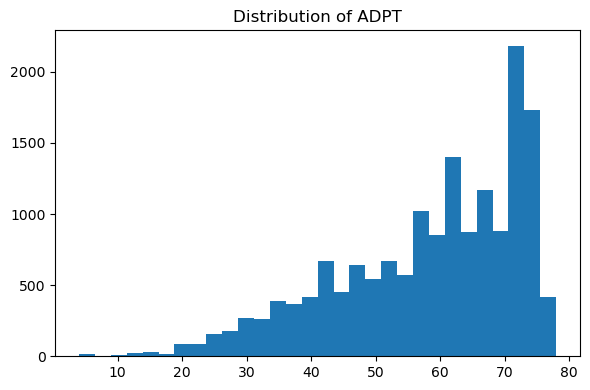

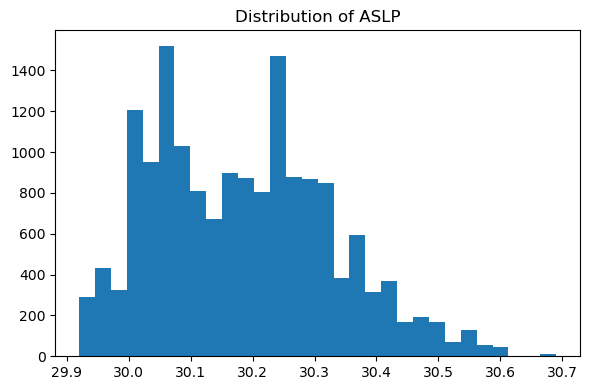

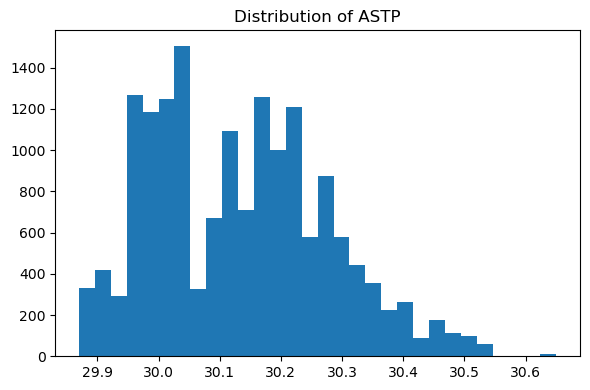

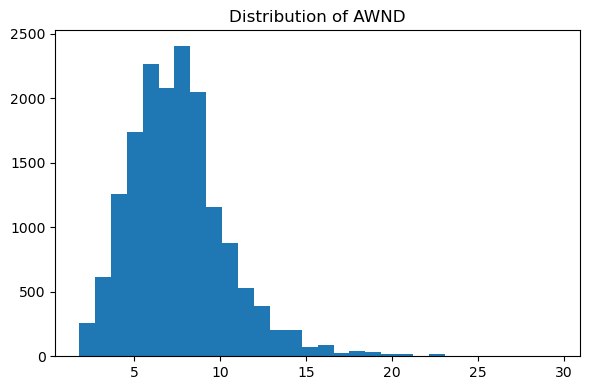

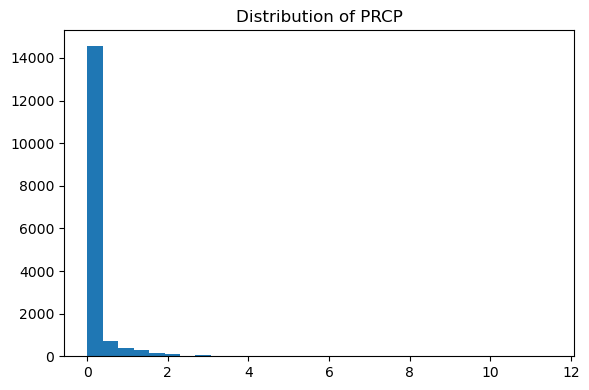

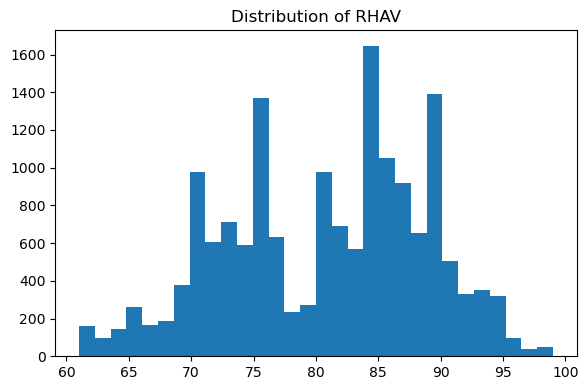

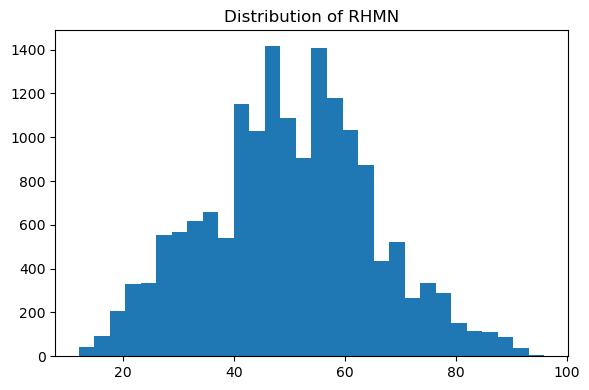

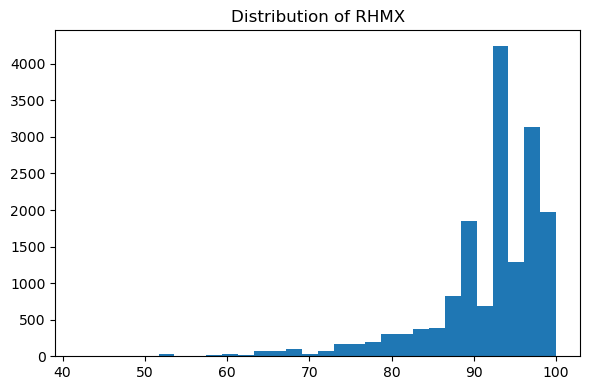

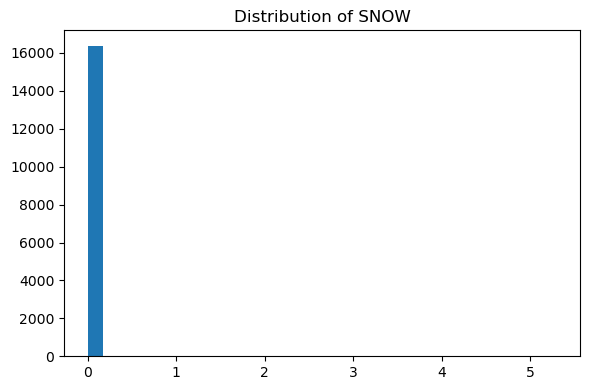

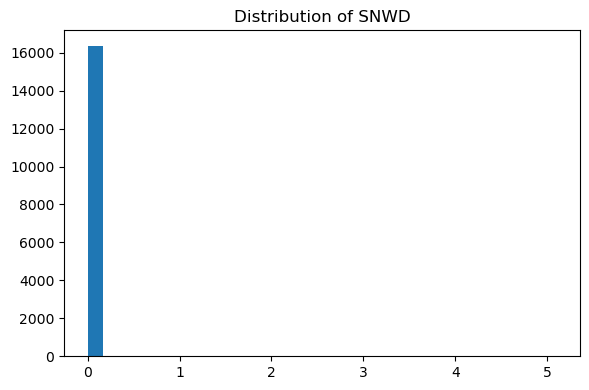

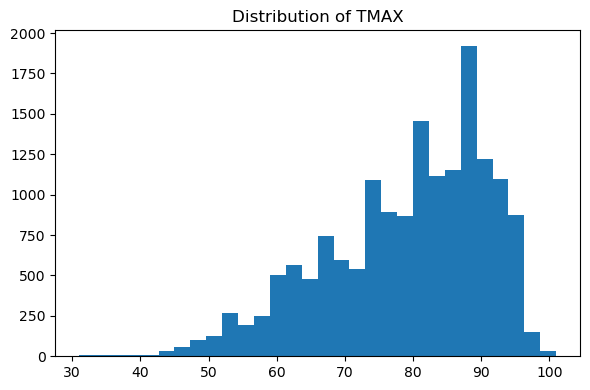

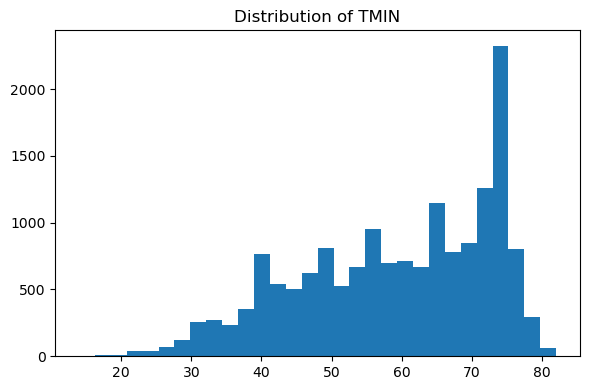

In [21]:
# Histograms to inspect distribution of weather variables
for col in [
    'ADPT',                                    
    'ASLP',                                    
    'ASTP',                                    
    'AWND',                                    
    'PRCP',                                    
    'RHAV',                                    
    'RHMN',                                    
    'RHMX',                                    
    'SNOW',                                    
    'SNWD',                                    
    'TMAX',                                    
    'TMIN'
]:
    plt.figure(figsize=(6, 4))
    plt.hist(merged_df2[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


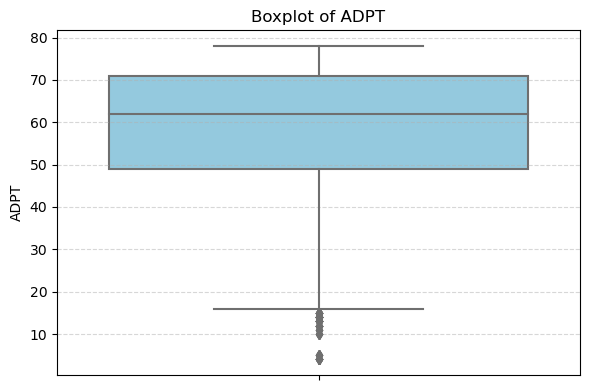

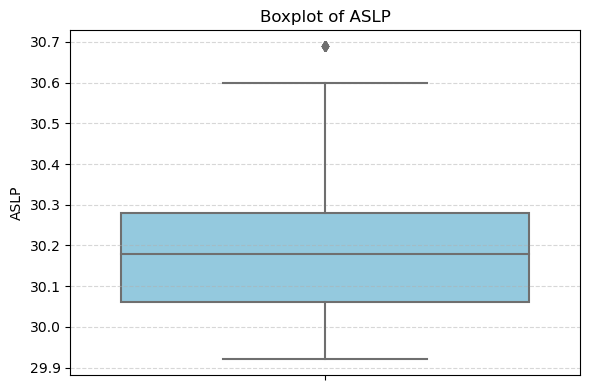

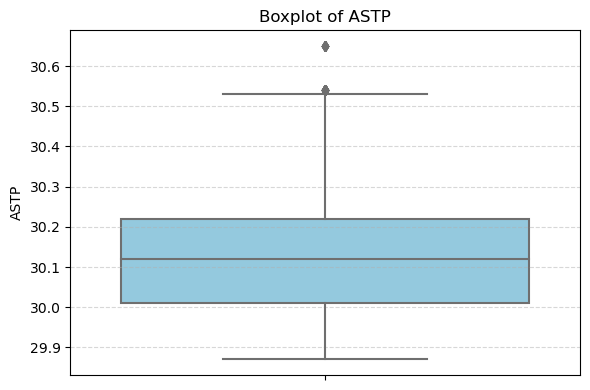

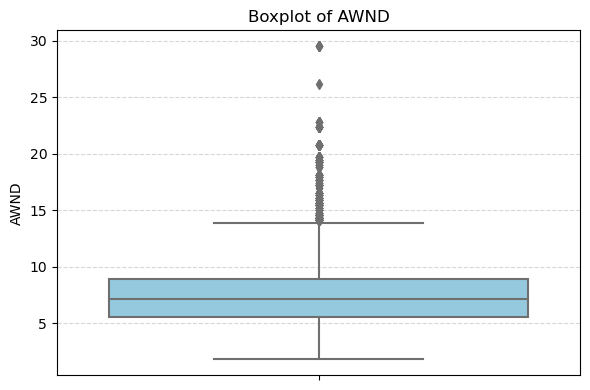

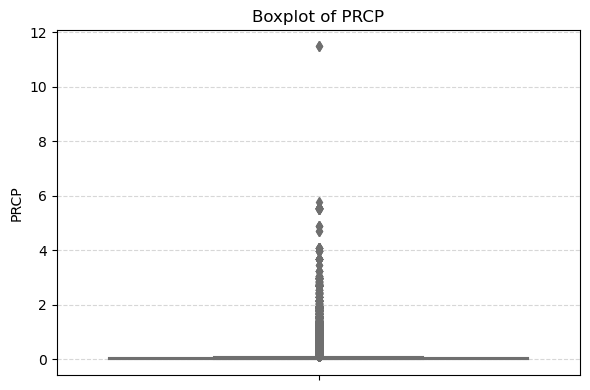

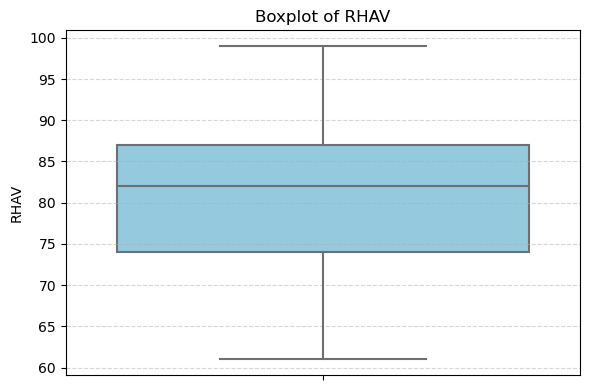

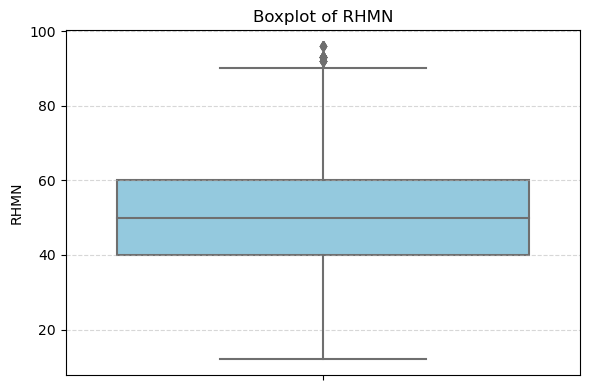

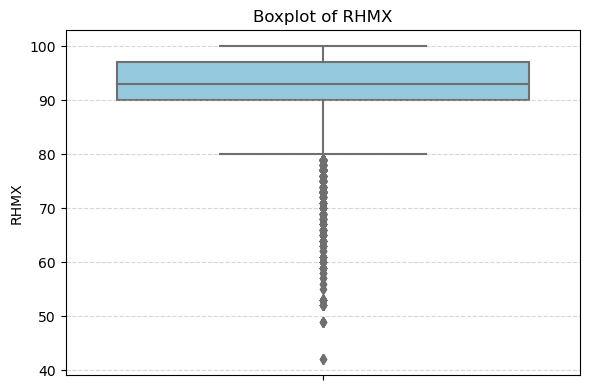

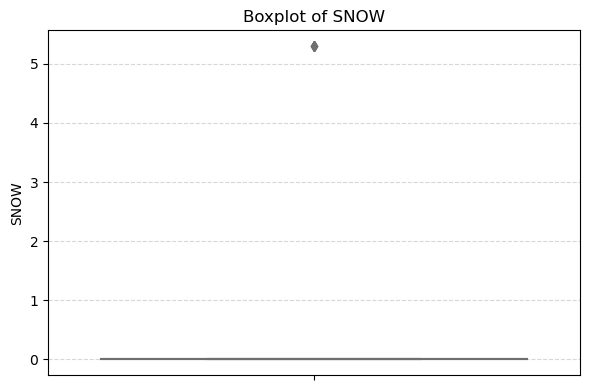

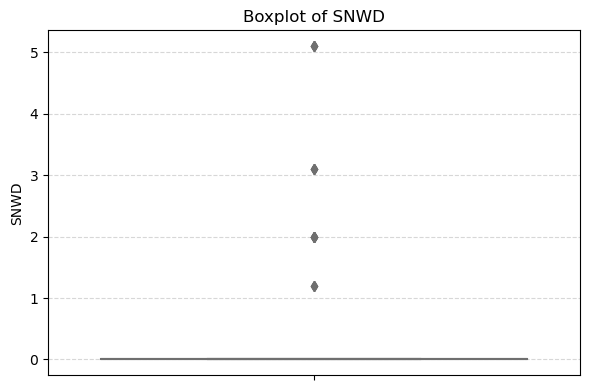

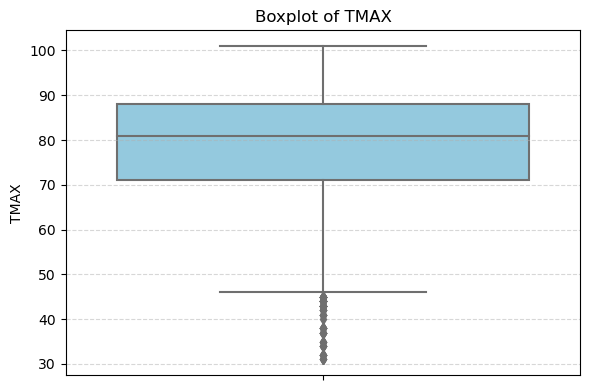

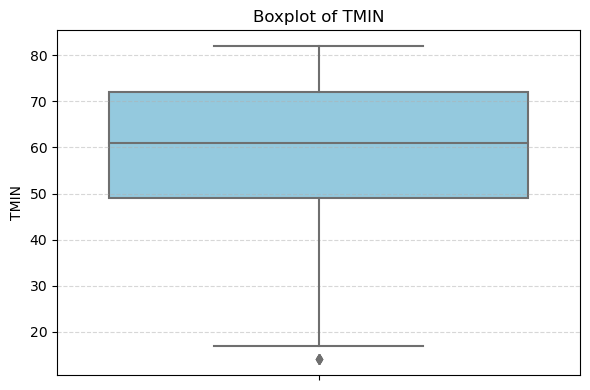

In [22]:
# Boxplots to check for outliers in weather features

weather_columns = [
    'ADPT', 'ASLP', 'ASTP', 'AWND', 'PRCP',
    'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD',
    'TMAX', 'TMIN'
]

for col in weather_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=merged_df2[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

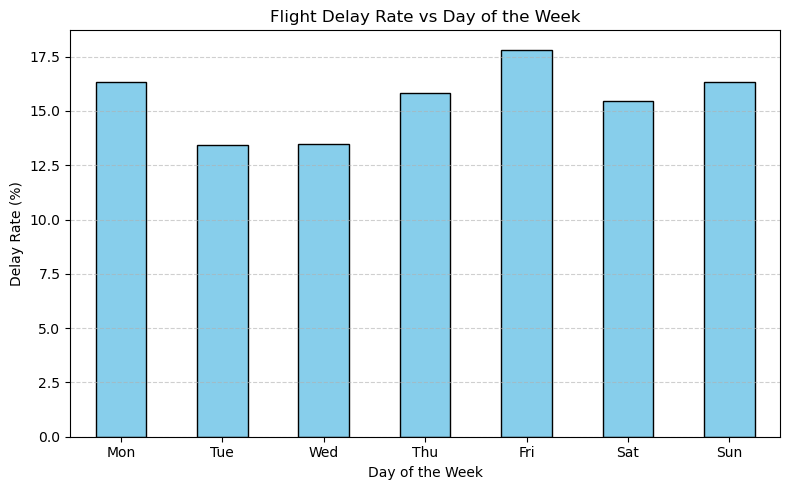

In [23]:
# Total and delayed flights by day


total_by_day = merged_df2.groupby('DayOfWeek')['Delay'].count()# how many TOTAL flights happened today?
delayed_by_day = merged_df2.groupby('DayOfWeek')['Delay'].sum()# how many delayed flights occured today

# Compute delay percentage
delay_rate = (delayed_by_day / total_by_day) * 100

# x-axis labels
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
delay_rate.index = [day_labels[i] for i in delay_rate.index]

plt.figure(figsize=(8, 5))
delay_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Delay Rate (%)')
plt.xlabel('Day of the Week')
plt.title('Flight Delay Rate vs Day of the Week')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [24]:

delay_columns = [
    'Delay Carrier (Minutes)',
    'Delay Weather (Minutes)',
    'Delay National Aviation System (Minutes)',
    'Delay Security (Minutes)',
    'Delay Late Aircraft Arrival (Minutes)'
]

# empty dictionaries to store the proportions, means and standard deviations of delays
proportions = {}
means = {}
stds = {}

# First, calculate total cumulative delay across all types
total_delay = 0
for col in delay_columns:
    total_delay = total_delay + merged_df2[col].sum()

# for each delay type, what proportion of this delay type contributes to the total delay
for col in delay_columns:
    col_total = merged_df2[col].sum()
    proportion = (col_total / total_delay) * 100
    
    # Filter only values > 15 for this type
    temp = merged_df2[col] > 15
    filtered = merged_df2[col][temp]
    
    # Store results
    proportions[col] = proportion
    means[col] = filtered.mean()
    stds[col] = filtered.std()
summary = pd.DataFrame({
    'Proportion (%) of Total Delay': proportions,
    'Mean Delay Time (min)': means,
    'Std Dev (min)': stds
})
summary

,Proportion (%) of Total Delay,Mean Delay Time (min),Std Dev (min)
Delay Carrier (Minutes),36.986041,152.149385,355.472291
Delay Weather (Minutes),3.406048,69.938596,72.228042
Delay National Aviation System (Minutes),12.794822,37.637394,34.375465
Delay Security (Minutes),0.076978,34.600000,22.210358
Delay Late Aircraft Arrival (Minutes),46.736112,82.410007,105.418455


### Remove outliers via Isolation Forest

In [25]:
merged_df3 = merged_df2.copy()

from sklearn.ensemble import IsolationForest
weather_features = ['ADPT', 'ASLP', 'ASTP', 'AWND', 'PRCP',
                    'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD',
                    'TMAX', 'TMIN']

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_flags = iso_forest.fit_predict(merged_df3[weather_features])

merged_df3 = merged_df3[outlier_flags == 1].copy()
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16215 entries, 0 to 16376
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   DATE                                      16215 non-null  datetime64[ns]
 1   Departure delay (Minutes)                 16215 non-null  float64       
 2   Delay Carrier (Minutes)                   16215 non-null  float64       
 3   Delay Weather (Minutes)                   16215 non-null  float64       
 4   Delay National Aviation System (Minutes)  16215 non-null  float64       
 5   Delay Security (Minutes)                  16215 non-null  float64       
 6   Delay Late Aircraft Arrival (Minutes)     16215 non-null  float64       
 7   ADPT                                      16215 non-null  float64       
 8   ASLP                                      16215 non-null  float64       
 9   ASTP                        

### Feature Engineering

In [26]:
# Add 7 day rolling averages

In [27]:
merged_df4 = merged_df3.copy()

# Compute 7-day rolling average for each weather column
weather_cols = [
    'ADPT', 'ASLP', 'ASTP', 'AWND', 'PRCP',
    'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD',
    'TMAX', 'TMIN'
]
# Ensure data is sorted by DATE beforehand
merged_df4 = merged_df4.sort_values('DATE')

for col in weather_cols:
    merged_df4[f'{col}_roll7'] = merged_df4[col].rolling(window=7, min_periods=1).mean()

merged_df4 = merged_df4.bfill()

In [28]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define transformers
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)  # For right-skewed
power_transformer = FunctionTransformer(lambda x: np.power(x, 2), validate=True)  # For left-skewed

# skewed variables
left_skewed = ['TMIN', 'ADPT', 'RHAV', 'RHMX', 'TMAX']
right_skewed = ['PRCP', 'AWND', 'SNOW', 'SNWD']

# sqrt transformation to right-skewed features
for feature in right_skewed:
        merged_df4[f"{feature}_sqrt"] = sqrt_transformer.transform(merged_df4[[feature]])

# square transformation to left-skewed features
for feature in left_skewed:
        merged_df4[f"{feature}_power"] = power_transformer.transform(merged_df4[[feature]])



C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without featur

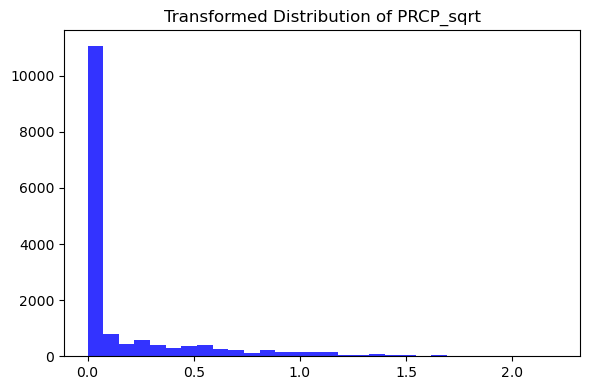

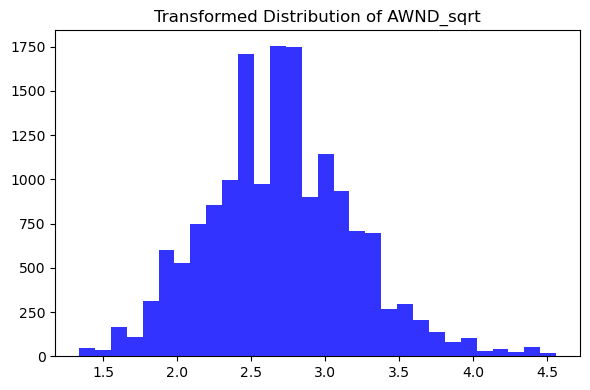

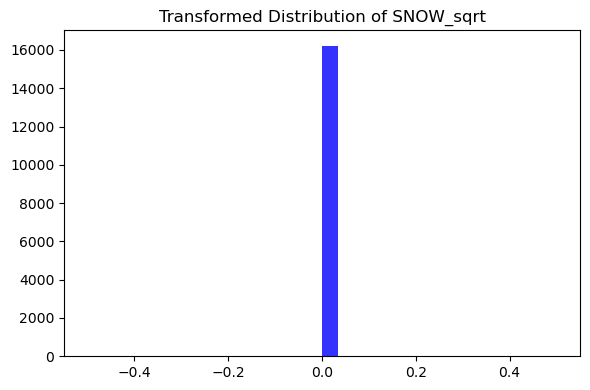

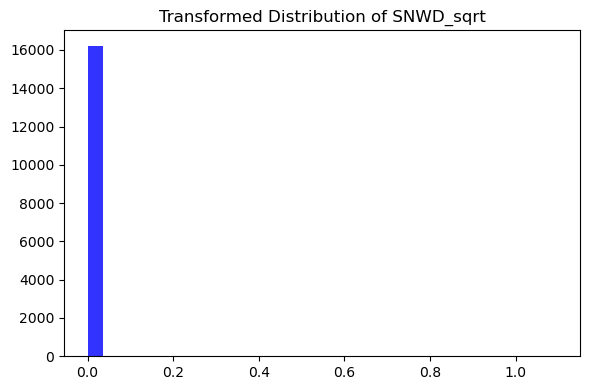

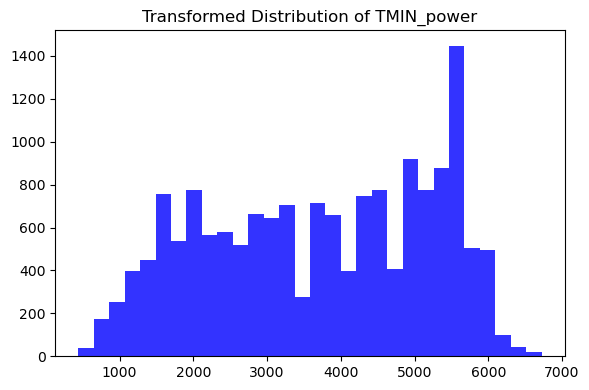

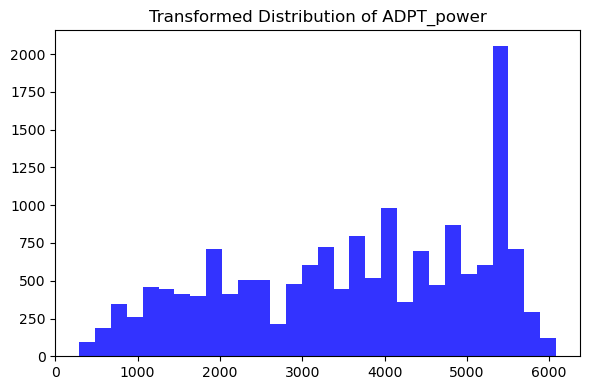

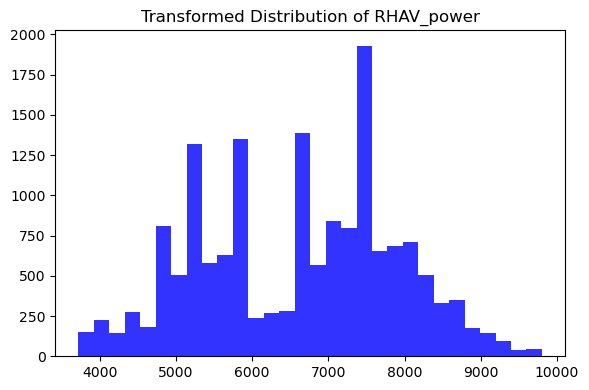

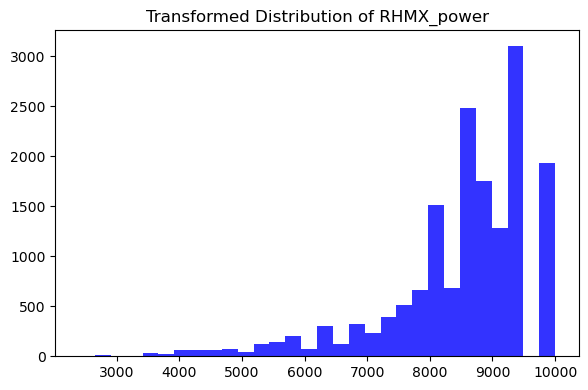

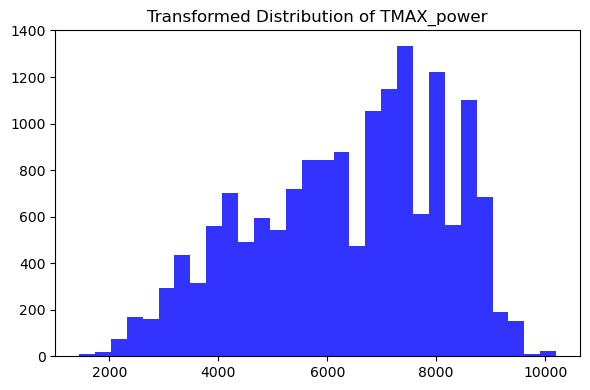

In [29]:
#successfully reduced skweness for AWND, TMIN, ADPT, RHAV, TMAAX
#NOT for PRCP, SNOW, SNWD, RHMX
# Plot the transformed columns
for col in [
    'PRCP_sqrt', 'AWND_sqrt', 'SNOW_sqrt', 'SNWD_sqrt',
    'TMIN_power', 'ADPT_power', 'RHAV_power', 'RHMX_power', 'TMAX_power'
]:
    if col in merged_df4.columns:
        plt.figure(figsize=(6, 4))
        plt.hist(merged_df4[col], bins=30, alpha=0.8, color='blue')
        plt.title(f'Transformed Distribution of {col}')
        plt.tight_layout()
        plt.show()



In [30]:
merged_df4['Snow_non-zero'] = (merged_df4['SNOW'] > 0).astype(int)
merged_df4['SnowDepth_non-zero'] = (merged_df4['SNWD'] > 0).astype(int)
# Add an isweekend column to maybe show higher delays over the weekend due to higher volumes of passengers
merged_df4['IsWeekend'] = merged_df4['DayOfWeek'].isin([5, 6]).astype(int)


### Binned plots of weather variables vs & delay

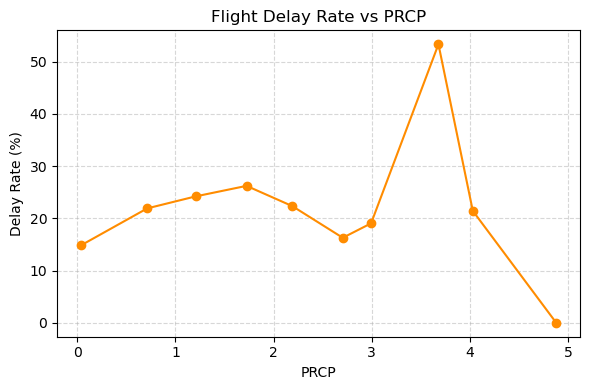

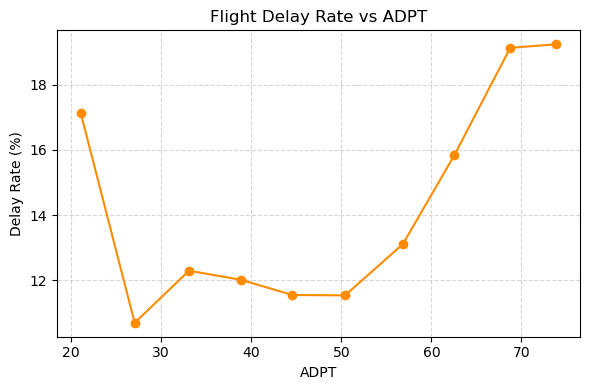

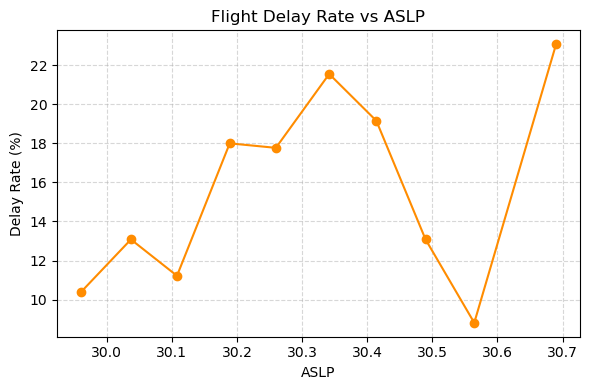

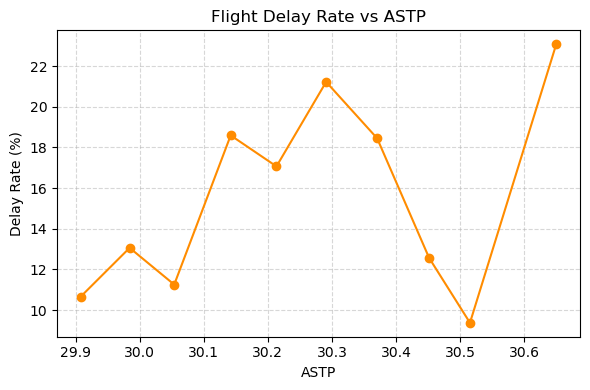

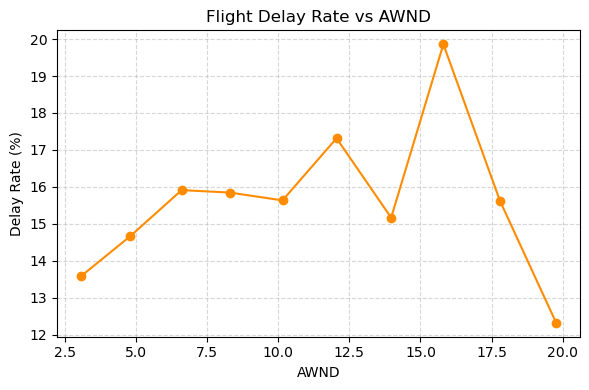

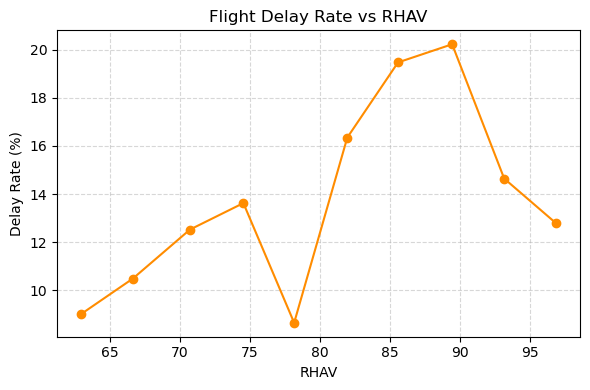

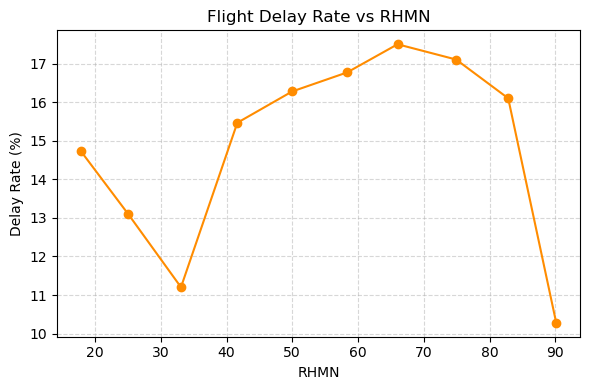

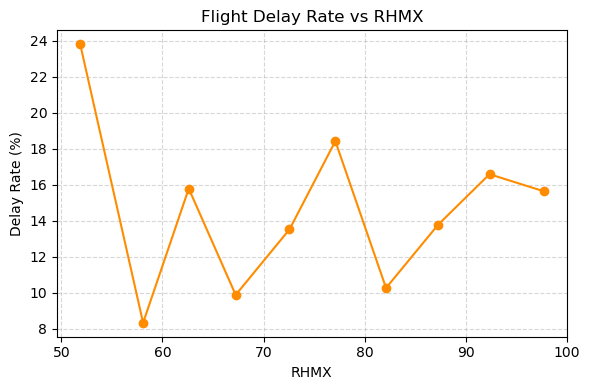

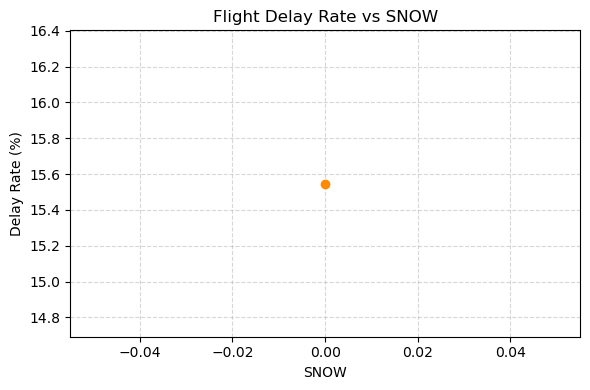

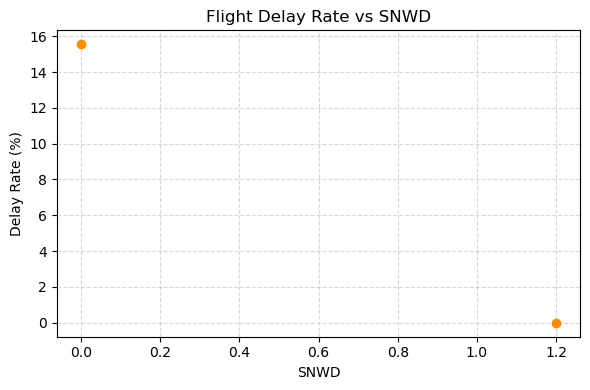

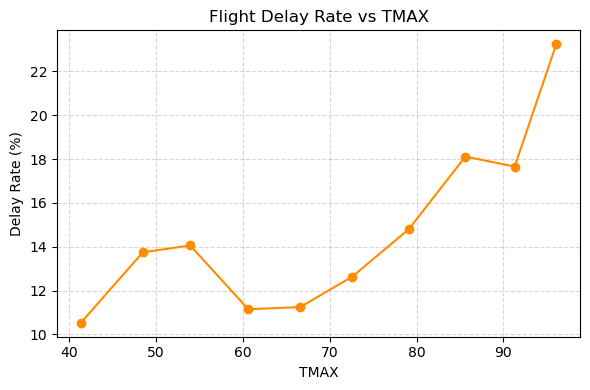

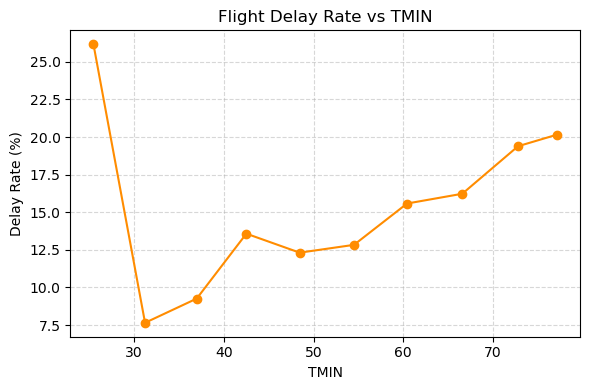

In [31]:


merged_df5 = merged_df4.copy()
weather_vars = [
    'PRCP', 'ADPT', 'ASLP', 'ASTP', 'AWND',
    'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD',
    'TMAX', 'TMIN'
]


for col in weather_vars:
        # organize the weather variables into 10 intervals
        merged_df5[f'{col}_bin'] = pd.cut(merged_df5[col], bins=10)

        # all (PRCP for example) values within this bin are grouped in it
        grouped = merged_df5.groupby(f'{col}_bin')

        # Calculate delay rate (%)
        total_flights = grouped.size()
        delayed_flights = grouped['Delay'].sum()
        delay_rate = (delayed_flights / total_flights) * 100

        # avg value of the weather variable in each group(bin) used as the x-axis.
        bin_midpoints = grouped[col].mean()


        plt.figure(figsize=(6, 4))
        plt.plot(bin_midpoints, delay_rate, marker='o', color='darkorange')
        plt.xlabel(col)
        plt.ylabel('Delay Rate (%)')
        plt.title(f'Flight Delay Rate vs {col}')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    

In [32]:
just_columns = pd.DataFrame(merged_df5.columns)
pd.set_option('display.max_rows', 10)
just_columns


,0
0,DATE
1,Departure delay (Minutes)
2,Delay Carrier (Minutes)
3,Delay Weather (Minutes)
4,Delay National Aviation System (Minutes)
...,...
61,RHMX_bin
62,SNOW_bin
63,SNWD_bin
64,TMAX_bin


## ######################################

## Train Models

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit

feature_importances = []


features_to_exclude = [
    'DATE', 'Delay', 'Departure delay (Minutes)', 'Delay Carrier (Minutes)',
    'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
    'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
    'PRCP_bin', 'ADPT_bin', 'ASLP_bin', 'ASTP_bin', 'AWND_bin',
    'RHAV_bin', 'RHMN_bin', 'RHMX_bin', 'SNOW_bin', 'SNWD_bin',
    'TMAX_bin', 'TMIN_bin', 
    'ADPT', 'ASLP', 'ASTP', 'AWND', 'PRCP', 'RHAV', 'RHMN',
    'RHMX', 'SNOW', 'SNWD', 'TMAX', 'TMIN'
]

X = merged_df5.drop(columns=features_to_exclude, errors='ignore')
y = merged_df5['Delay']

tscv = TimeSeriesSplit(n_splits=10)

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    rf_model = RandomForestClassifier(
        class_weight='balanced',
        max_depth=5,
        min_samples_split=5,
        n_estimators=100,
        random_state=42
    )

    rf_model.fit(X_train, y_train)
    feature_importances.append(rf_model.feature_importances_)

# Avg feature importances across all folds
avg_importance = np.mean(feature_importances, axis=0)

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_importance
}).sort_values(by='Importance', ascending=False)

feature_importances_df


,Feature,Importance
21,TMIN_roll7,0.062617
20,TMAX_roll7,0.060662
10,ADPT_roll7,0.059733
14,PRCP_roll7,0.059666
27,ADPT_power,0.058373
...,...,...
18,SNOW_roll7,0.000000
24,SNOW_sqrt,0.000000
25,SNWD_sqrt,0.000000
31,Snow_non-zero,0.000000


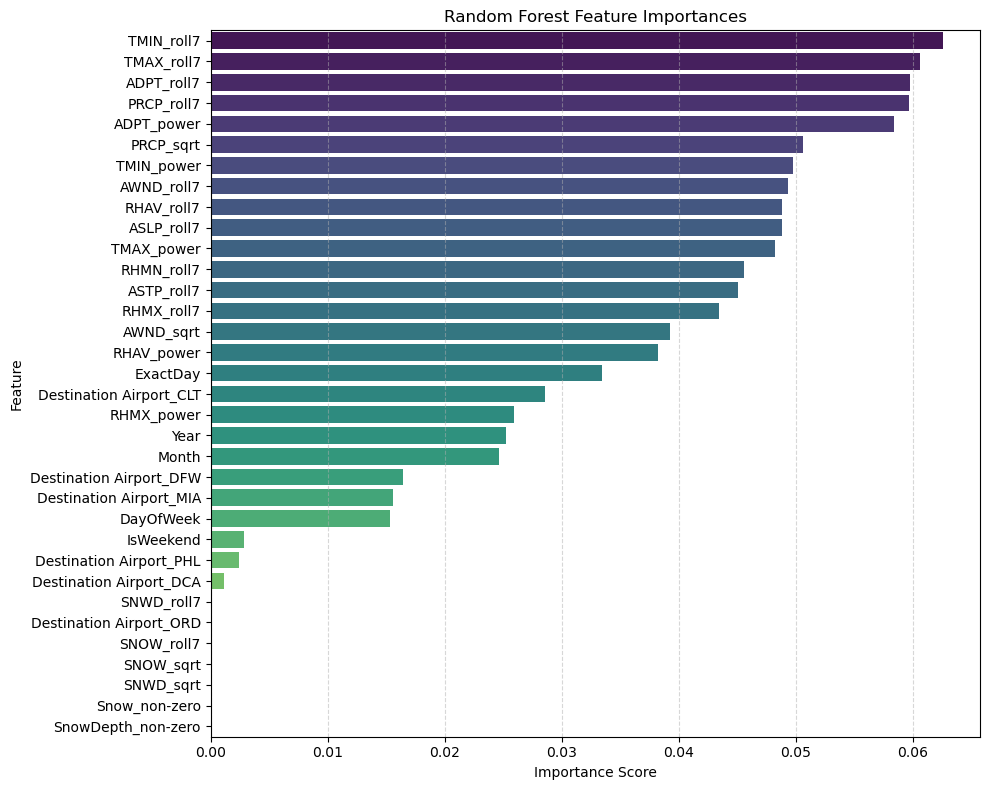

In [34]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit

# Top features according to the random forest model
features_to_include = [
    "Year", "ADPT_roll7", "TMIN_roll7", "TMAX_roll7", "ADPT_power", 
    "AWND_roll7", "TMIN_power", "PRCP_roll7", "PRCP_sqrt", 
    "ASLP_roll7", "TMAX_power", "RHAV_roll7", "RHMN_roll7", 
    "RHAV_power", "ASTP_roll7", "AWND_sqrt", "RHMX_roll7",
    "Destination Airport_CLT", "Month", "ExactDay", "RHMX_power", 
    "Destination Airport_DFW", "Destination Airport_MIA", "DayOfWeek"
]

X = merged_df5[features_to_include]# Features
y = merged_df5['Delay']# target

# Preserves chronological order
tscv = TimeSeriesSplit(n_splits=10)

# metrics
accuracies = []
precisions = []
recalls = []
f1s = []
conf_matrix_filled = np.array([[0, 0], 
                               [0, 0]])

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model = RandomForestClassifier(
        class_weight='balanced', # balances the dataset
        max_depth=5,
        min_samples_split=5,
        n_estimators=100,
        random_state=42
    )

    # train rf model
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    #metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    my_conf = confusion_matrix(y_test, y_pred)

    # Store
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    conf_matrix_filled = conf_matrix_filled + my_conf

# Average metrics across 10 folds

print("accuracy:", np.mean(accuracies))
print("precision:", np.mean(precisions))
print("recall:", np.mean(recalls))
print("f1_score:", np.mean(f1s))
print("\n")
print( conf_matrix_filled)


accuracy: 0.5490502035278155
precision: 0.1850224588164409
recall: 0.5230461681076155
f1_score: 0.26191254859934027


[[6749 5639]
 [1008 1344]]


In [36]:
#GridSearchCV for best hyperparameters

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Features and target
X = merged_df5[features_to_include]
y = merged_df5['Delay']

# Set up the time series cross-validator
tscv = TimeSeriesSplit(n_splits=10)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5],
    'class_weight': [None, 'balanced']
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=tscv,  # time-based cross-validation
    scoring='f1',  # focus on class imbalance
    n_jobs=-1,
    verbose=2
)

# Fit to entire dataset (let GridSearchCV do the splits)
grid_search.fit(X, y)

# Output best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best F1 Score: 0.2754979172275174


accuracy: 0.4432157394843962
precision: 0.1703251808944683
recall: 0.6501503234316456
f1_score: 0.2666800008614453


[[4914 7474]
 [ 733 1619]]


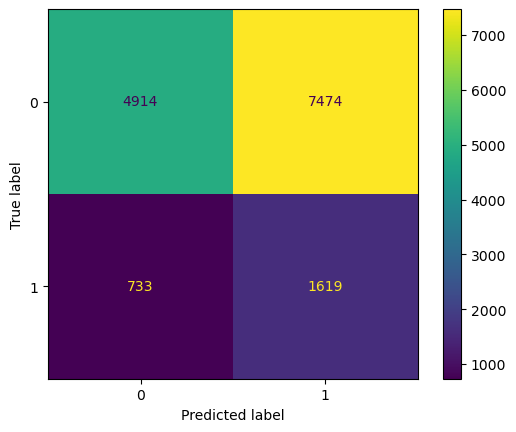

In [37]:
from sklearn import metrics
# Best hyperparameters 

#Define features and target
features_to_include = [
    "Year", "ADPT_roll7", "TMIN_roll7", "TMAX_roll7", "ADPT_power", 
    "AWND_roll7", "TMIN_power", "PRCP_roll7", "PRCP_sqrt", 
    "ASLP_roll7", "TMAX_power", "RHAV_roll7", "RHMN_roll7", 
    "RHAV_power", "ASTP_roll7", "AWND_sqrt", "RHMX_roll7",
    "Destination Airport_CLT", "Month", "ExactDay", "RHMX_power", 
    "Destination Airport_DFW", "Destination Airport_MIA", "DayOfWeek"
]


X = merged_df5[features_to_include]# Features
y = merged_df5['Delay']# target

# Preserves chronological order
tscv = TimeSeriesSplit(n_splits=10)

# metrics
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrix_filled = np.array([[0, 0],
                               [0, 0]])

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Best hyperparameters according to GridSearch
    rf_model = RandomForestClassifier(class_weight= 'balanced', 
                                      max_depth= 3,
                                      min_samples_leaf=1, 
                                      min_samples_split= 5, 
                                      n_estimators= 10
    )
     # train rf model
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    #metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    my_conf = confusion_matrix(y_test, y_pred)

    # Append to lists
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    confusion_matrix_filled = confusion_matrix_filled + my_conf

# Average metrics across 10 folds

print("accuracy:", np.mean(accuracies))
print("precision:", np.mean(precisions))
print("recall:", np.mean(recalls))
print("f1_score:", np.mean(f1s))
print("\n")
print( confusion_matrix_filled)


#display confustion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_filled, display_labels = [0, 1])
cm_display.plot()
plt.show()


# Logistic Regresssion

accuracy: 0.3685888738127544
precision: 0.16953106138300605
recall: 0.7595529428865485
f1_score: 0.2743067955804172


[[3561 8827]
 [ 480 1872]]


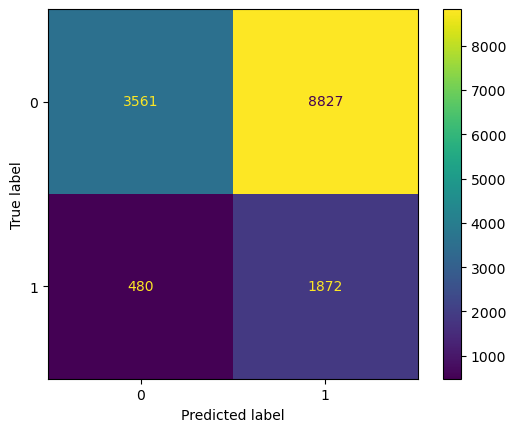

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Top features according to random forest model
X = merged_df5[features_to_include]
y = merged_df5['Delay']#target

# Preserves chronological order
tscv = TimeSeriesSplit(n_splits=10)

# metrics
accuracies = []
precisions = []
recalls = []
f1s = []

confusion_matrix_filled1= np.array([[0, 0],
                                   [0, 0]])
# Preserves chronological order
tscv = TimeSeriesSplit(n_splits=10)
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Logistic Regression requires standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression with class weight
    lr_model = LogisticRegression(class_weight='balanced', # balances the dataset
                                  random_state=42)
    
    #fit a logistic regression model
    lr_model.fit(X_train_scaled, y_train)
    y_pred = lr_model.predict(X_test_scaled)

     #metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    my_conf1 = confusion_matrix(y_test, y_pred)

    # Append to lists
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    confusion_matrix_filled1 = confusion_matrix_filled1 + my_conf1

# Average metrics across 10 folds

print("accuracy:", np.mean(accuracies))
print("precision:", np.mean(precisions))
print("recall:", np.mean(recalls))
print("f1_score:", np.mean(f1s))
print("\n")
print(confusion_matrix_filled1)

#display confustion matrix
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_filled1, display_labels = [0, 1])
cm_display1.plot()
plt.show()


# Support Vector Machine

accuracy: 0.4725237449118046
precision: 0.17235503819284426
recall: 0.6102839284809753
f1_score: 0.2636092567617033


[[5429 6959]
 [ 816 1536]]


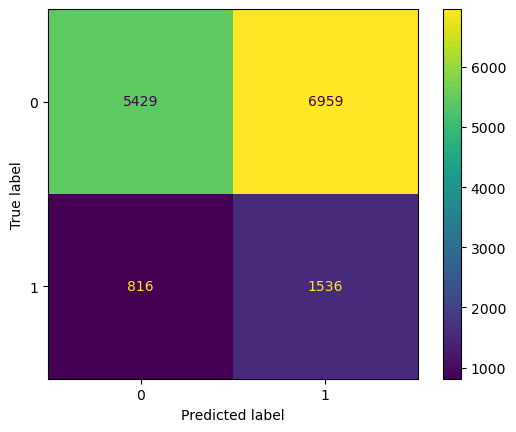

In [39]:
from sklearn.svm import SVC

# Top features accoring to random forest model
X = merged_df5[features_to_include]# Features
y = merged_df5['Delay']# target

# Preserves chronological order
tscv = TimeSeriesSplit(n_splits=10)

# metrics
accuracies = []
precisions = []
recalls = []
f1s = []
confusion_matrix_filled2 = np.array([[0, 0], 
                                    [0, 0]])

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # SVM requires standardization    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svm_model = SVC(class_weight='balanced', kernel='rbf', random_state=42)# kernal rbf is best for non-linear data
    
    # fit rf model
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)

    #metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    my_conf2 = confusion_matrix(y_test, y_pred)

    # Collect
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    confusion_matrix_filled2  = confusion_matrix_filled2 + my_conf2


# Average metrics across 10 folds

print("accuracy:", np.mean(accuracies))
print("precision:", np.mean(precisions))
print("recall:", np.mean(recalls))
print("f1_score:", np.mean(f1s))
print("\n")
print(confusion_matrix_filled2)


#display confustion matrix
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_filled2, display_labels = [0, 1])
cm_display2.plot()
plt.show()

# Test Data (2024)

In [49]:
# Load weather data
tweather_df = pd.read_csv("X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ScientificComp/CHSWEATHER2024ONLY.csv")
tweather_df["DATE"] = pd.to_datetime(tweather_df["DATE"])  # Convert into date format

# Load flight delay data
tflights_df = pd.read_csv("X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ScientificComp/2024ONLYDetailed_Statistics_Departures.csv") 
tflights_df["DATE"] = pd.to_datetime(tflights_df["DATE"])  # Convert date format

In [50]:
tmerged_df = pd.merge(tflights_df, tweather_df, on="DATE", how="inner")


In [51]:
tmerged_df1 = tmerged_df.copy()
tmerged_df1 = tmerged_df.drop(['STATION','WESD', 'WSF1', 'WT01','WT03','WT05', 'WT11','Carrier Code', 'Flight Number','Tail Number','Scheduled departure time','Actual departure time'], axis=1, errors='ignore')  # Ignore any error that may arrise if columns don't exist
tmerged_df1.isnull().sum()


DATE                                0
Destination Airport                 0
Scheduled elapsed time (Minutes)    0
Actual elapsed time (Minutes)       0
Departure delay (Minutes)           0
                                   ..
RHMX                                0
SNOW                                0
SNWD                                0
TMAX                                0
TMIN                                0
Length: 24, dtype: int64

In [52]:
from sklearn.impute import KNNImputer

tweather_cols = ['ADPT', 'ASLP', 'ASTP', 'AWND', 'RHAV','RHMN','RHMX']
timputer = KNNImputer(n_neighbors=5)

# Create a separate DataFrame with just the weather columns
tweather_data = tmerged_df1[tweather_cols]

# Fit and transform the imputer
tweather_imputed = timputer.fit_transform(tweather_data)

# Assign imputed values back column-by-column using a classic loop
for i in range(len(tweather_cols)):
    col = tweather_cols[i]
    tmerged_df1[col] = tweather_imputed[:, i]

# Check for missing values
print(tmerged_df1.isnull().sum())

DATE                                0
Destination Airport                 0
Scheduled elapsed time (Minutes)    0
Actual elapsed time (Minutes)       0
Departure delay (Minutes)           0
                                   ..
RHMX                                0
SNOW                                0
SNWD                                0
TMAX                                0
TMIN                                0
Length: 24, dtype: int64


In [53]:
tmerged_df1= pd.get_dummies(tmerged_df1, columns=['Destination Airport'], dtype=int)


In [54]:
tmerged_df1['ExactDay'] = tmerged_df1['DATE'].dt.day
tmerged_df1['Month'] = tmerged_df1['DATE'].dt.month
tmerged_df1['Year'] = tmerged_df1['DATE'].dt.year
tmerged_df1['DayOfWeek'] = tmerged_df1['DATE'].dt.dayofweek
tmerged_df1

,DATE,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),...,Destination Airport_CLT,Destination Airport_DCA,Destination Airport_DFW,Destination Airport_MIA,Destination Airport_ORD,Destination Airport_PHL,ExactDay,Month,Year,DayOfWeek
0,2024-01-01,194.0,178.0,412.0,14:08,10.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,1,2024,0
1,2024-01-01,67.0,52.0,-7.0,9:21,10.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,2024,0
2,2024-01-01,105.0,101.0,22.0,18:53,17.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,1,2024,0
3,2024-01-01,104.0,90.0,3.0,6:21,13.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,1,2024,0
4,2024-01-01,104.0,92.0,30.0,19:32,13.0,5.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,1,2024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,2024-12-31,65.0,51.0,-8.0,5:11,9.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,31,12,2024,1
4888,2024-12-31,107.0,101.0,-4.0,6:00,11.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,31,12,2024,1
4889,2024-12-31,191.0,192.0,-6.0,15:46,18.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,31,12,2024,1
4890,2024-12-31,71.0,77.0,-8.0,7:19,27.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,31,12,2024,1


In [55]:
tmerged_df1['Delay'] = (tmerged_df1['Departure delay (Minutes)'] > 15).astype(int)


In [56]:
tmerged_df2 = tmerged_df1.copy()

from sklearn.ensemble import IsolationForest
tweather_features = ['ADPT', 'ASLP', 'ASTP', 'AWND', 'PRCP',
                    'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD',
                    'TMAX', 'TMIN']

tiso_forest = IsolationForest(contamination=0.01, random_state=42)
toutlier_flags = tiso_forest.fit_predict(tmerged_df2[tweather_features])

tmerged_df2 = tmerged_df2[toutlier_flags == 1].copy()
tmerged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 4891
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   DATE                                      4849 non-null   datetime64[ns]
 1   Scheduled elapsed time (Minutes)          4849 non-null   float64       
 2   Actual elapsed time (Minutes)             4849 non-null   float64       
 3   Departure delay (Minutes)                 4849 non-null   float64       
 4   Wheels-off time                           4849 non-null   object        
 5   Taxi-Out time (Minutes)                   4849 non-null   float64       
 6   Delay Carrier (Minutes)                   4849 non-null   float64       
 7   Delay Weather (Minutes)                   4849 non-null   float64       
 8   Delay National Aviation System (Minutes)  4849 non-null   float64       
 9   Delay Security (Minutes)      

In [58]:

tweather_features = ['ADPT', 'ASLP', 'ASTP', 'AWND', 'PRCP',
                    'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD',
                    'TMAX', 'TMIN']

tiso_forest = IsolationForest(contamination=0.01, random_state=42)
toutlier_flags = tiso_forest.fit_predict(tmerged_df2[tweather_features])

tmerged_df2 = tmerged_df2[toutlier_flags == 1].copy()
tmerged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4891
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   DATE                                      4800 non-null   datetime64[ns]
 1   Scheduled elapsed time (Minutes)          4800 non-null   float64       
 2   Actual elapsed time (Minutes)             4800 non-null   float64       
 3   Departure delay (Minutes)                 4800 non-null   float64       
 4   Wheels-off time                           4800 non-null   object        
 5   Taxi-Out time (Minutes)                   4800 non-null   float64       
 6   Delay Carrier (Minutes)                   4800 non-null   float64       
 7   Delay Weather (Minutes)                   4800 non-null   float64       
 8   Delay National Aviation System (Minutes)  4800 non-null   float64       
 9   Delay Security (Minutes)      

In [62]:
tmerged_df3 = tmerged_df2.copy()

tweather_cols = [
    'ADPT', 'ASLP', 'ASTP', 'AWND', 'PRCP',
    'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD',
    'TMAX', 'TMIN'
]

tmerged_df3= tmerged_df3.sort_values('DATE')

for col in weather_cols:
    tmerged_df3[f'{col}_roll7'] = tmerged_df3[col].rolling(window=7, min_periods=1).mean()

tmerged_df3 = tmerged_df3.bfill()

In [63]:

# Define transformers
tsqrt_transformer = FunctionTransformer(np.sqrt, validate=True)  # For right-skewed
tpower_transformer = FunctionTransformer(lambda x: np.power(x, 2), validate=True)  # For left-skewed

# Columns to transform
tleft_skewed = ['TMIN', 'ADPT', 'RHAV', 'RHMX', 'TMAX']
tright_skewed = ['PRCP', 'AWND', 'SNOW', 'SNWD']

#sqrt transformation for right-skewed features
for feature in tright_skewed:
    if feature in tmerged_df3.columns:
        tmerged_df3[f"{feature}_sqrt"] = tsqrt_transformer.transform(tmerged_df3[[feature]])

# square transformation for left-skewed features
for feature in tleft_skewed:
    if feature in tmerged_df3.columns:
        tmerged_df3[f"{feature}_power"] = tpower_transformer.transform(tmerged_df3[[feature]])

C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without featur

In [64]:
tmerged_df3['Snow_non-zero'] = (tmerged_df3['SNOW'] > 0).astype(int)
tmerged_df3['SnowDepth_non-zero'] = (tmerged_df3['SNWD'] > 0).astype(int)
# Add an isweeked column to maybe show higher delays over the weekend due to higher volumes of passengers
tmerged_df3['IsWeekend'] = tmerged_df3['DayOfWeek'].isin([5, 6]).astype(int)


### Logistic regression was the best so it's the final model used for the test data

Test Accuracy: 0.34625
Test Precision: 0.20266957232361754
Test Recall: 0.7790575916230367
Test F1 Score: 0.3216601815823606
Confusion matrix:
[[ 918 2927]
 [ 211  744]]


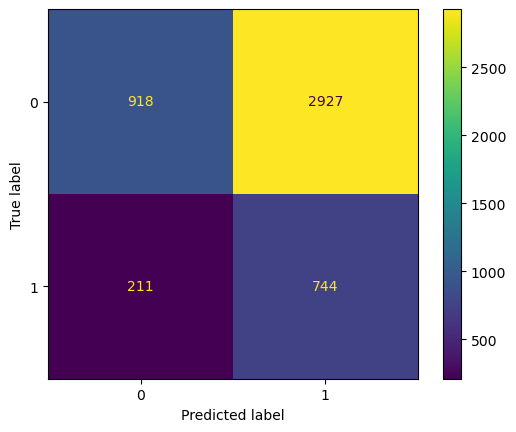

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# final Training Data
X_train_final = merged_df5[features_to_include]
y_train_final = merged_df5['Delay']

# 2024: Test Data
X_test_final = tmerged_df3[features_to_include]
y_test_final = tmerged_df3['Delay']

# Standardize dataset
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_test_final_scaled = scaler.transform(X_test_final)

# Ensure you train on all 2014–2023 data
final_lr_model = LogisticRegression(class_weight='balanced', random_state=42)
final_lr_model.fit(X_train_final_scaled, y_train_final)

# Predict on only 2024 test data
y_test_pred = final_lr_model.predict(X_test_final_scaled)

# Performance Evaluations for 2024 Test Data
acc = accuracy_score(y_test_final, y_test_pred)
prec = precision_score(y_test_final, y_test_pred)
rec = recall_score(y_test_final, y_test_pred)
f1 = f1_score(y_test_final, y_test_pred)

my_conf = confusion_matrix(y_test_final, y_test_pred)

# Print results
print(f"Test Accuracy: {acc}")
print(f"Test Precision: {prec}")
print(f"Test Recall: {rec}")
print(f"Test F1 Score: {f1}")
print("Confusion matrix:")
print(my_conf)

# Display Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=my_conf, display_labels=[0, 1])
cm_display.plot()
plt.show()

